## Лабораторная работа №1

## Поэлементные преобразования изображений

Вариант: №3

Выполнил: Новицкий Никита

Группа: 6132-010402D

1. Считать цветное rgb изображение
2. Преобразовать изображение в градации серого
3. Написать функцию реализации поэлементной обработки изображения

> Функцию вида fun(Image, prepfun)  
Где prepfun  - конкретная функция препаирования, заданная в том или ином виде

4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Порог определить на глаз по гистограмме
5. Сделать пороговую обработку методом Otsu (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей
  *   Вход: изображение у которого диапазон не на всем промежутке [0,255] или использовать 
  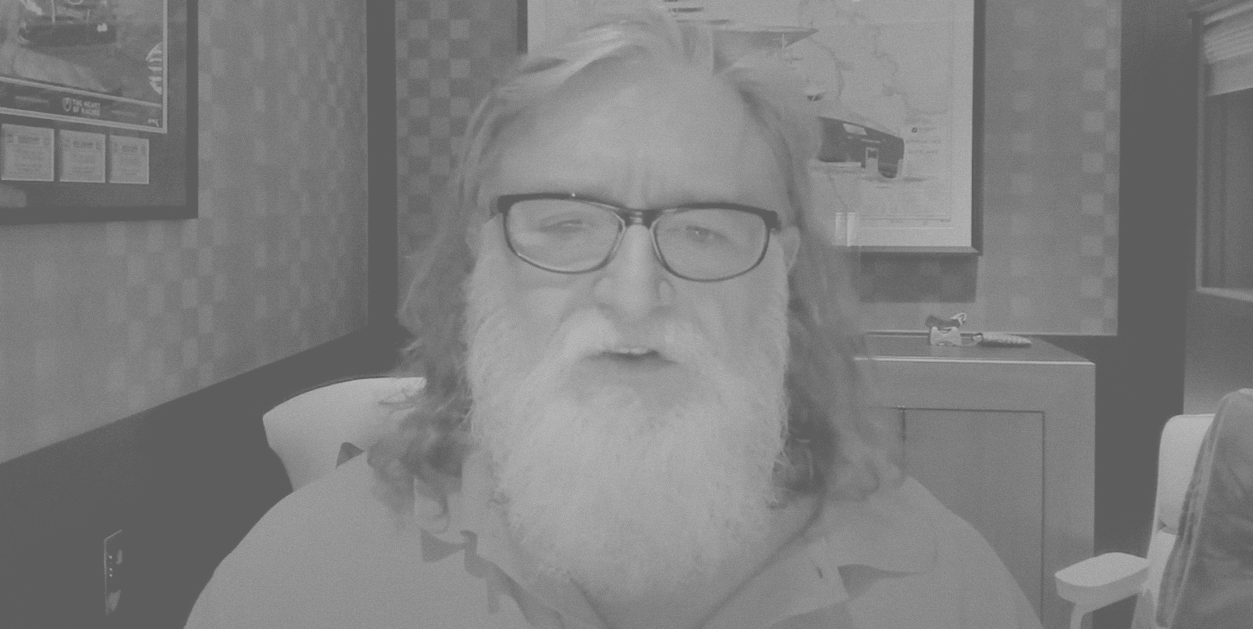
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Вычислить коэффициенты $a$ и $b$. Сделать преобразование вида $g =a*f+b$
7. Сделать эквализацию гистограммы изображения
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
8. Сделать эквализацию методом CLAHE (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
9. Осуществить препарирование изображения с заданной препарирующей функцией
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
  *   Пороги в препарирующей функции выбирать самостоятельно
  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного. После преобразований изображений выводить их гистограммы.*

In [1]:
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *

filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
print(f'Версия matplotlib: {matplotlib.__version__}')
print(f'Версия numpy: {np.__version__}')
print(f'Версия opencv: {cv2.__version__}')

Версия matplotlib: 3.5.1
Версия numpy: 1.21.5
Версия opencv: 4.5.5


In [3]:
def rendering(img_grayscale, _bins=256, cdf_plot=False, plot_title=None):
    """Функция отрисовки графиков."""
    plt.figure(figsize=(10, 5))
    plt.xlim([0, 256])

    if plot_title:
        title(plot_title)

    hist, bins = np.histogram(img_grayscale.flatten(), _bins, [0, 256])
    cdf = hist.cumsum() * float(hist.max()) / (hist.cumsum()).max()

    if cdf_plot:
        plt.plot(cdf, color='blue')
        plt.hist(img_grayscale.flatten(), _bins, [0, 256], color='red')
        plt.legend(('Функция распределения', 'Гистограмма'), loc='upper right')
    else:
        plt.hist(img_grayscale.flatten(), bins=_bins,
                 density=True, color='blue')

    plt.grid(True)
    plt.show()

## Задание 1.

Считать цветное rgb изображение.

In [4]:
def show_image(image):
    """Функция для вывода изображения."""
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) if len(
        image.shape) == 3 else plt.imshow(image, cmap='gray')

In [5]:
image = cv2.imread('../images/guido.jpeg')

Исходное изображение:


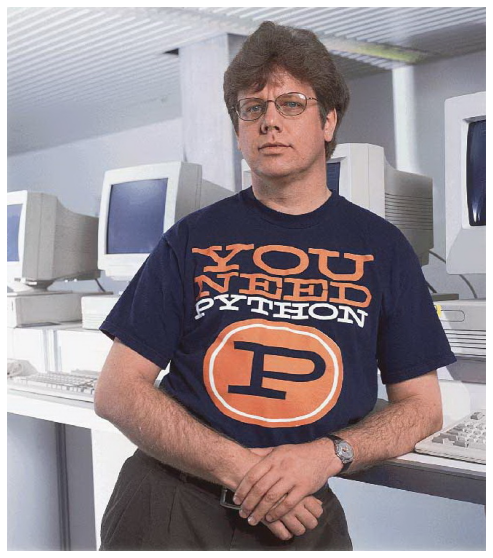

In [6]:
print('Исходное изображение:')
show_image(image)

## Задание 2. 

Преобразовать изображение в градации серого

In [7]:
def grayscale_image(image):
    """Функция для преобразования в градации серого."""
    return (np.dot(image[..., :3], np.array([0.2126, 0.7152, 0.0722]))).astype(np.uint8)

Преобразованное изображение в градации серого:


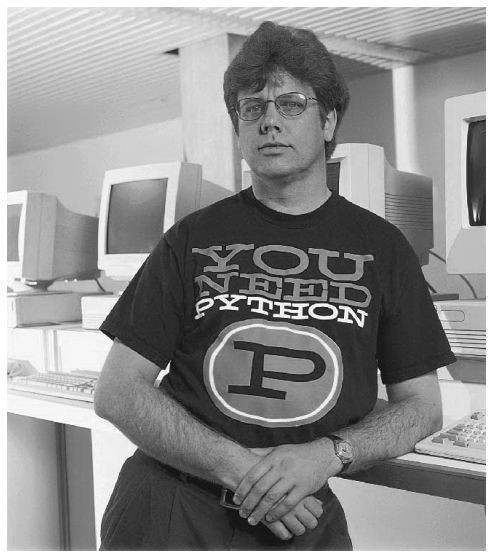

In [8]:
print('Преобразованное изображение в градации серого:')
gray_img = grayscale_image(image)
show_image(gray_img)

## Задание 3. 

Написать функцию реализации поэлементной обработки изображения

> Функцию вида fun(Image, prepfun)  
Где prepfun  - конкретная функция препаирования, заданная в том или ином виде

В данном варианте функция препарирования представляет собой неполную пороговую обработку:

\begin{equation*}
y(x) =
 \begin{cases}
   \frac{x * 150}{y} &\text{ if x < y}\\
   255 &\text{ else}
 \end{cases}
\end{equation*}

$$y - const$$

In [9]:
def dissection(x, a=255, y=140):
    """Функция препарирования."""
    return (x * 150) / y if x < y else a

## Задание 4.

По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Порог определить на глаз по гистограмме

In [10]:
def threshold_processing(grayscale_image, threshold):
    """Функция пороговой обработки."""
    return np.vectorize(lambda x: 255 if x > threshold else 0)(grayscale_image)

Исходное изображение:


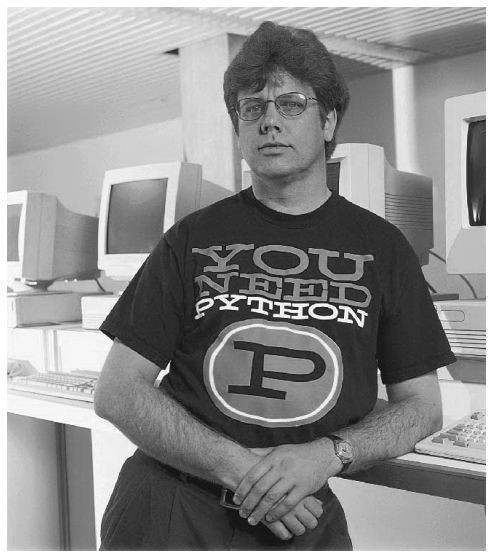

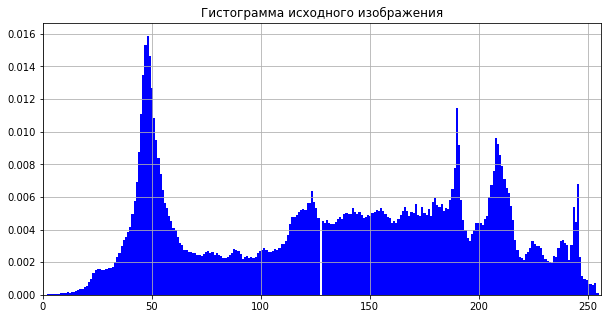

In [11]:
print('Исходное изображение:')
show_image(gray_img)
rendering(gray_img, plot_title='Гистограмма исходного изображения')

Изображение после пороговой обработки:


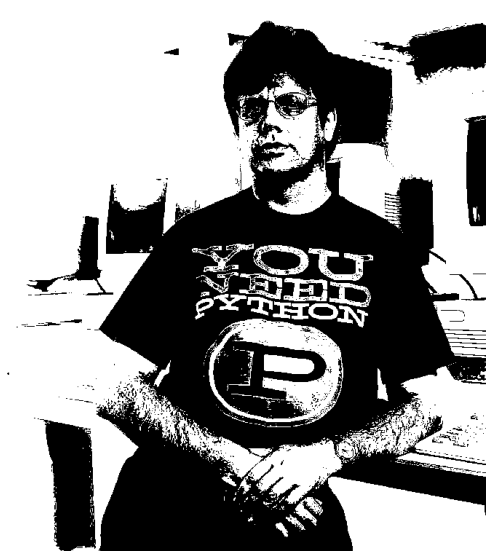

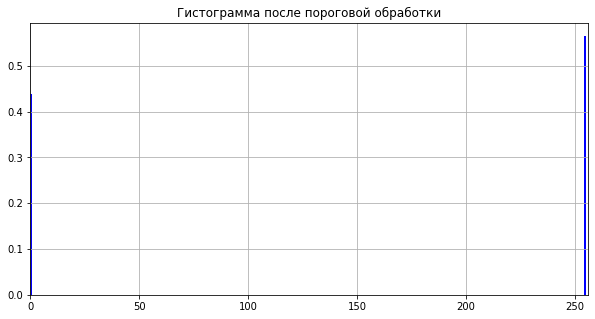

In [12]:
print('Изображение после пороговой обработки:')
img_threshold = threshold_processing(gray_img, 128)
show_image(img_threshold)
rendering(img_threshold, plot_title='Гистограмма после пороговой обработки')

## Задание 5. 

Сделать пороговую обработку методом Otsu (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно

In [13]:
opencv_threshold, opencv_threshold_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU)

Пороговая обработка методом Otsu изображения:


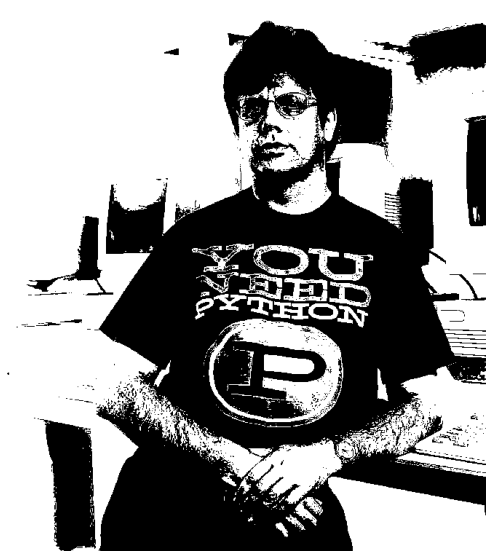

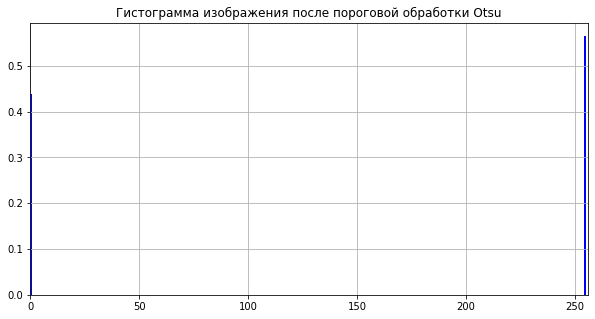

In [14]:
print('Пороговая обработка методом Otsu изображения:')
show_image(opencv_threshold_image)
rendering(opencv_threshold_image,
          plot_title='Гистограмма изображения после пороговой обработки Otsu')

## Задание 6. 

 Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей
  *   Вход: изображение у которого диапазон не на всем промежутке [0,255] или использовать 
  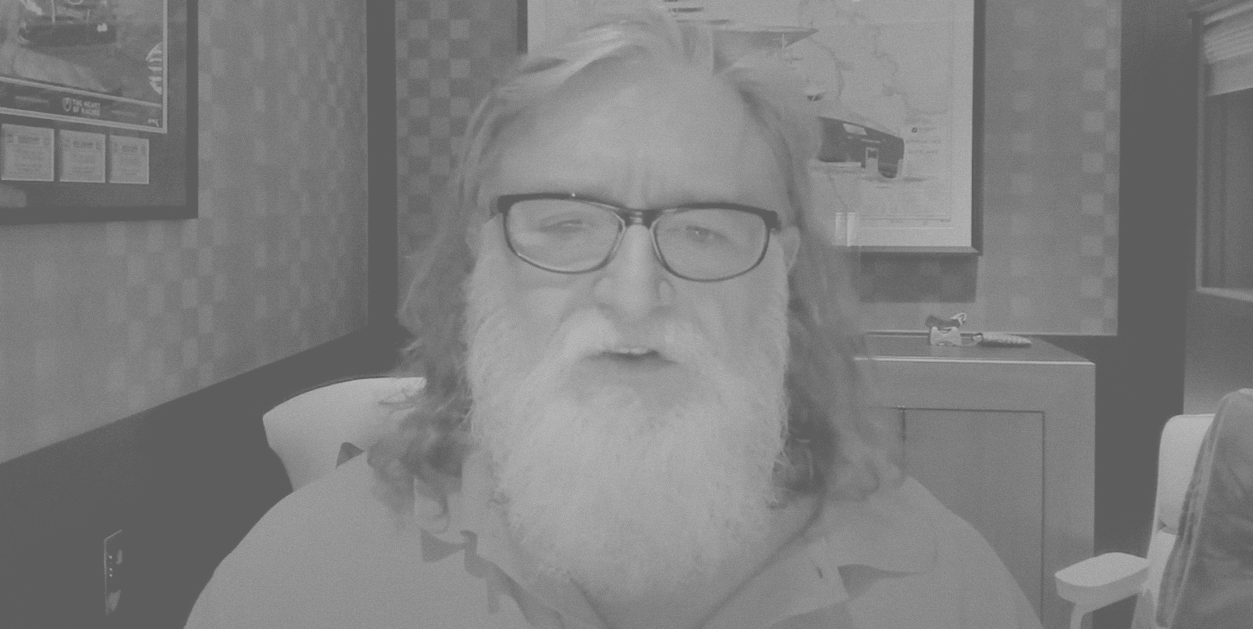
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно
  *   Вычислить коэффициенты $a$ и $b$. Сделать преобразование вида $g =a*f+b$

In [15]:
def linear_contrast(grayscale_image):
    """Функция линейного контрастирования."""
    results = {
        'original_range': None,
        'original_image': None,
        'a': None,
        'b': None,
        'result_range': None,
        'result_image': None
    }

    x_min, x_max = grayscale_image.flatten().min(), grayscale_image.flatten().max()
    y_min, y_max = 0, 255
    a, b = (y_max - y_min) / (x_max - x_min), (y_min *
                                               x_max - y_max * x_min) / (x_max - x_min)

    result_image = (np.vectorize(lambda x: a * x + b)
                    (grayscale_image)).astype(np.uint8)

    results['original_range'] = (x_min, x_max)
    results['original_image'] = grayscale_image.copy()
    results['a'], results['b'] = a, b
    results['result_range'] = (
        result_image.flatten().min(), result_image.flatten().max())
    results['result_image'] = result_image.copy()

    return results

In [16]:
gaben = cv2.imread('../images/gaben.png')
gaben_grayscale = grayscale_image(gaben)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [17]:
linear_contrast_results = linear_contrast(gaben_grayscale)
print(
    f"Линейное преобразование для данного изображения: y = {linear_contrast_results['a']} * x + {linear_contrast_results['b']}")

Линейное преобразование для данного изображения: y = 2.8333333333333335 * x + -263.5


Динамический диапазон исходного изображения: (93, 183)


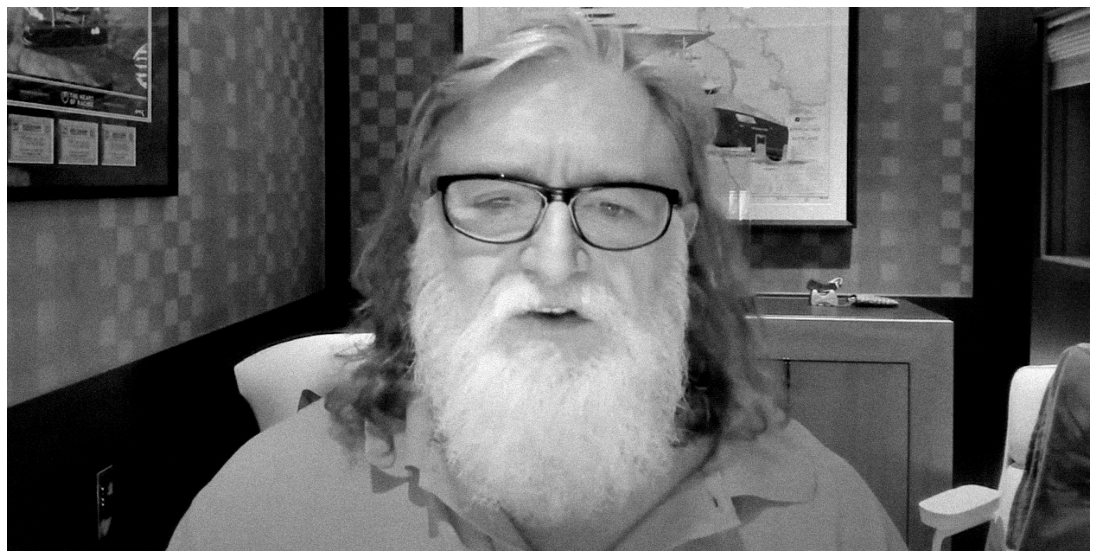

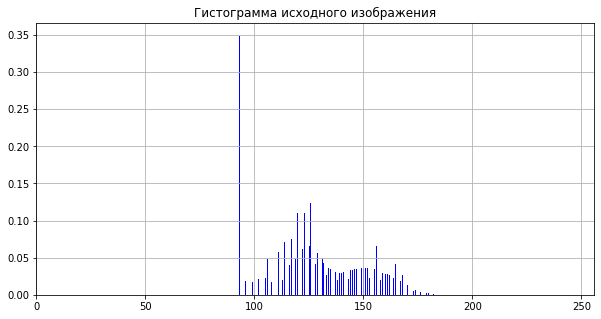

In [18]:
print(
    f"Динамический диапазон исходного изображения: {linear_contrast_results['original_range']}")
show_image(linear_contrast_results['original_image'])
rendering(linear_contrast_results['original_image'],
          plot_title='Гистограмма исходного изображения')

Динамический диапазон после линейного контрастирования: (0, 255)


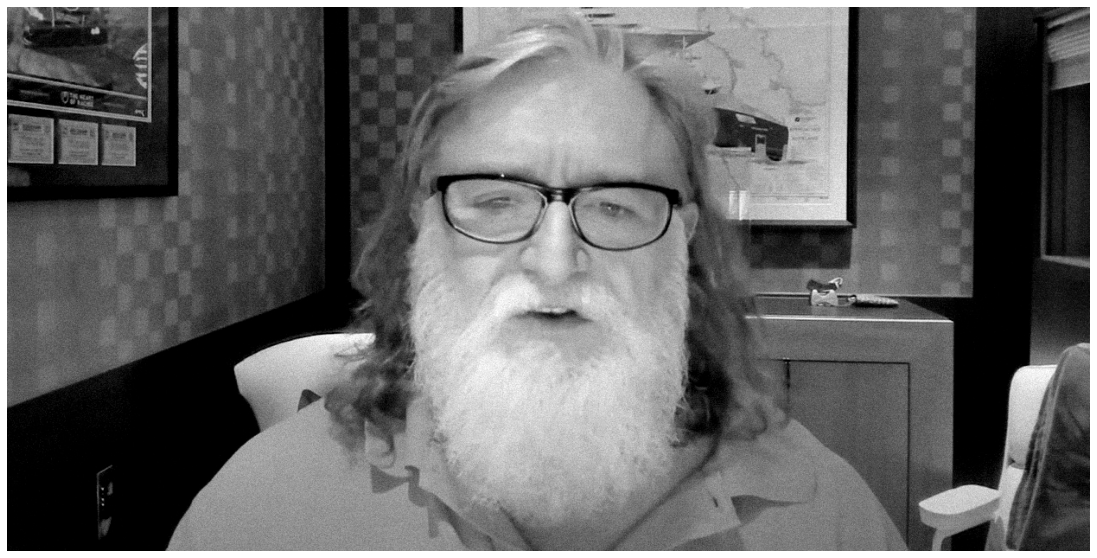

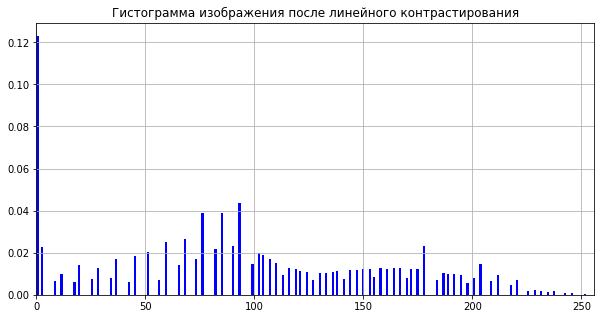

In [19]:
print(
    f"Динамический диапазон после линейного контрастирования: {linear_contrast_results['result_range']}")
show_image(linear_contrast_results['result_image'])
rendering(linear_contrast_results['result_image'],
          plot_title='Гистограмма изображения после линейного контрастирования')

## Задание 7. 

Сделать эквализацию гистограммы изображения
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно

In [20]:
def equalization(grayscale_image):
    """Функция эквализации гистограммы изображения."""
    n, m = grayscale_image.shape
    hist, bins = np.histogram(grayscale_image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()

    return (((cdf - cdf[0]) * 255 / (n * m - 1)).astype(np.uint8))[grayscale_image]

Исходное изображение:


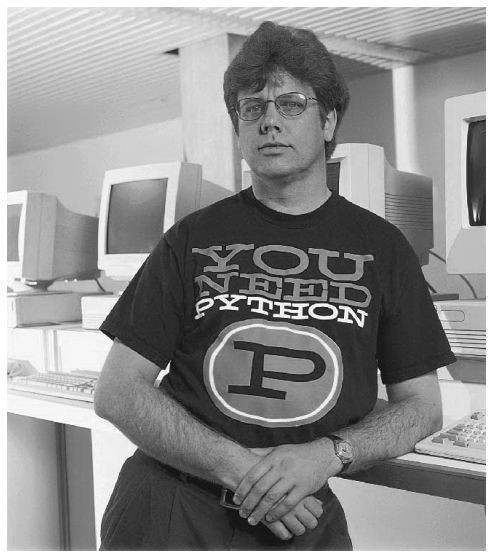

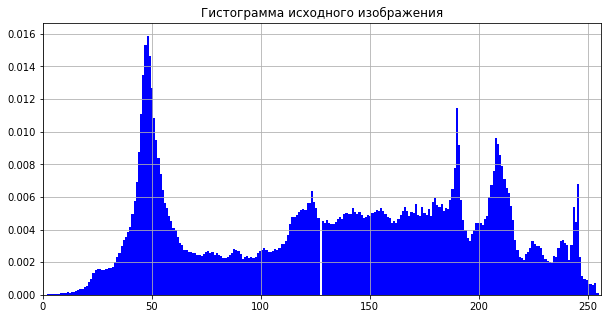

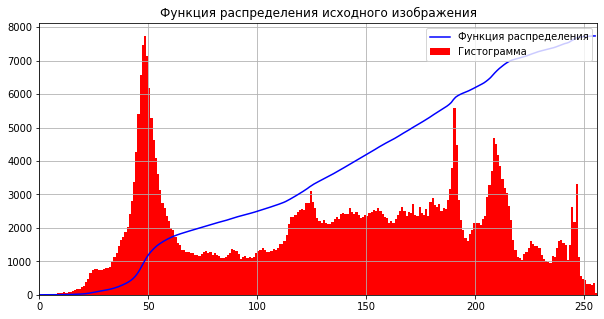

In [21]:
print('Исходное изображение:')
show_image(gray_img)
rendering(gray_img, plot_title='Гистограмма исходного изображения')
rendering(
    gray_img, plot_title='Функция распределения исходного изображения', cdf_plot=True)

Эквализированное изображение:


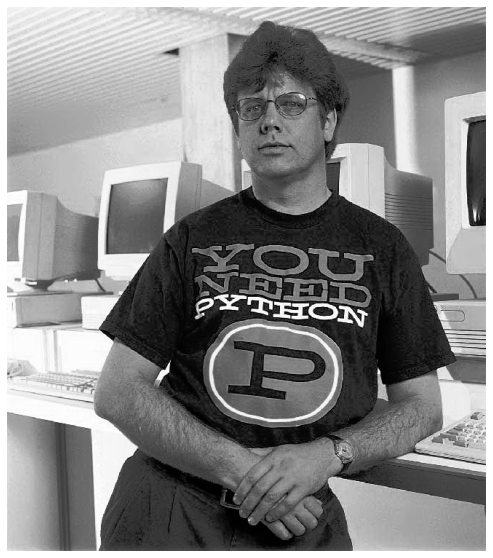

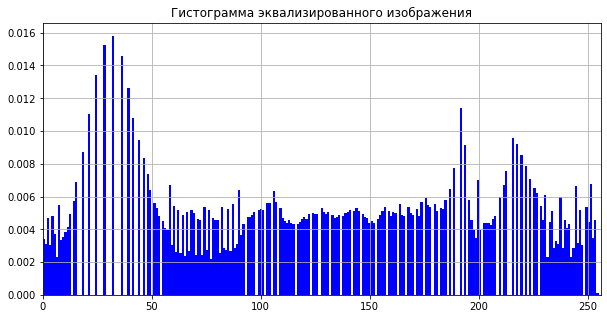

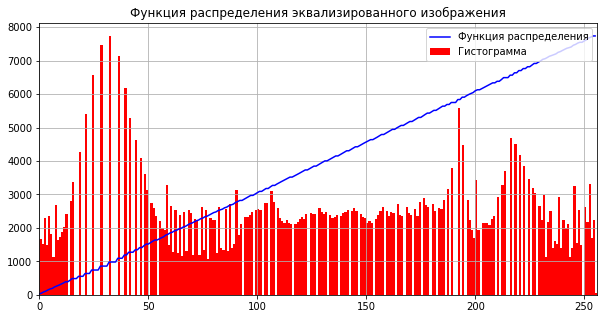

In [22]:
print('Эквализированное изображение:')
image_equal = equalization(gray_img)
show_image(image_equal)
rendering(image_equal, plot_title='Гистограмма эквализированного изображения')
rendering(image_equal,
          plot_title='Функция распределения эквализированного изображения', cdf_plot=True)

## Задание 8. 

Сделать эквализацию методом CLAHE (Функция OpenCV)
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно

In [23]:
opencv_image_equal = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(gray_img)

Эквализированное изображение по CLAHE:


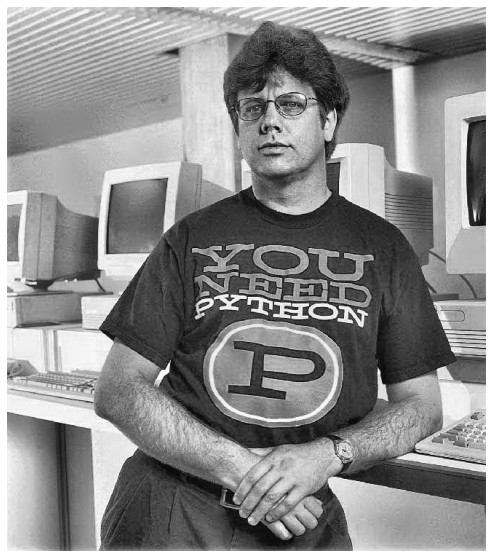

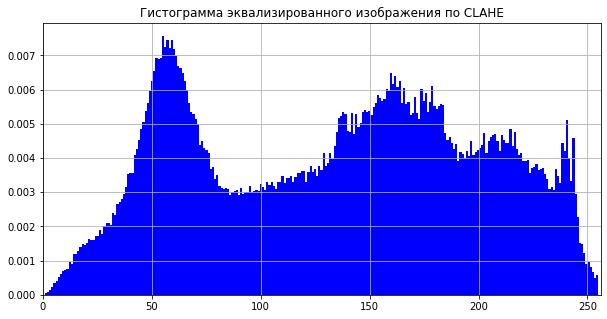

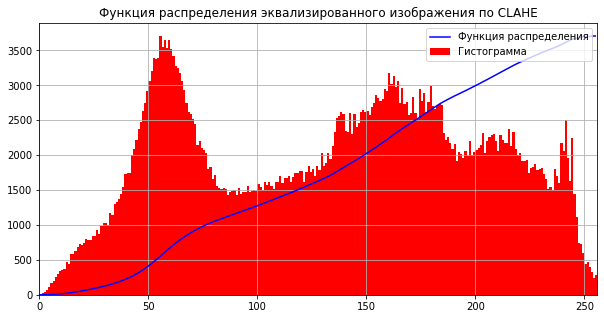

In [24]:
print('Эквализированное изображение по CLAHE:')
show_image(opencv_image_equal)
rendering(opencv_image_equal,
          plot_title='Гистограмма эквализированного изображения по CLAHE')
rendering(opencv_image_equal,
          plot_title='Функция распределения эквализированного изображения по CLAHE', cdf_plot=True)

## Задание 9. 

Осуществить препарирование изображения с заданной препарирующей функцией
  *   Вход: изображение из пункта 2
  *   Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
  *   Пороги в препарирующей функции выбирать самостоятельно
  

In [25]:
def image_preparation(grayscale_image, dissection):
    """Функция препарирования изображения."""
    return (np.vectorize(dissection)(grayscale_image)).astype(np.uint8)

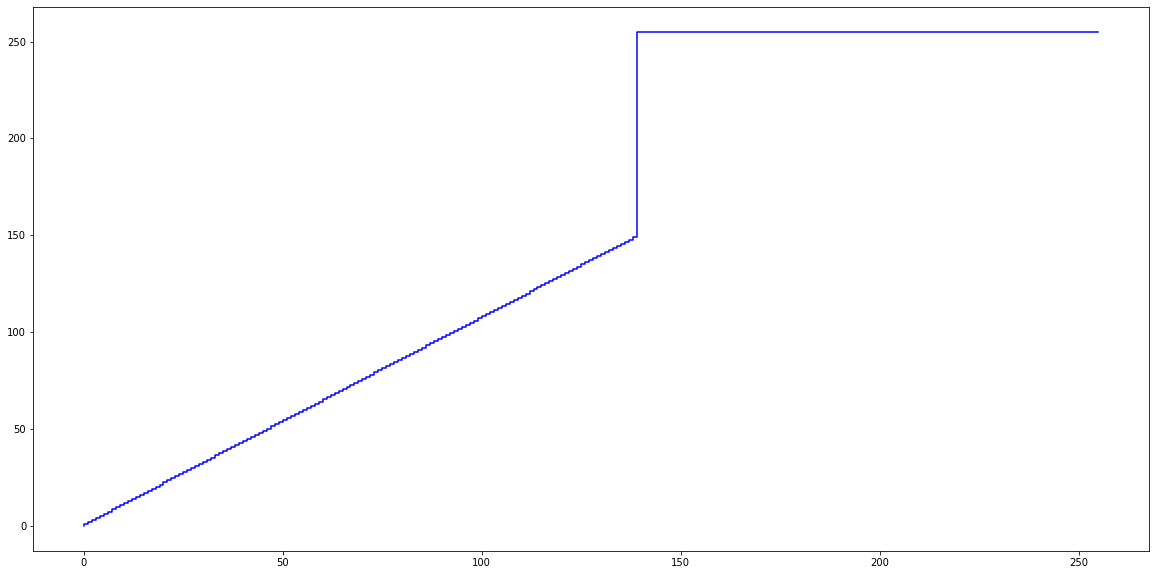

In [26]:
plt.step(range(0, 256), [dissection(x) for x in range(0, 256)], c='blue')

Исходное изображение:


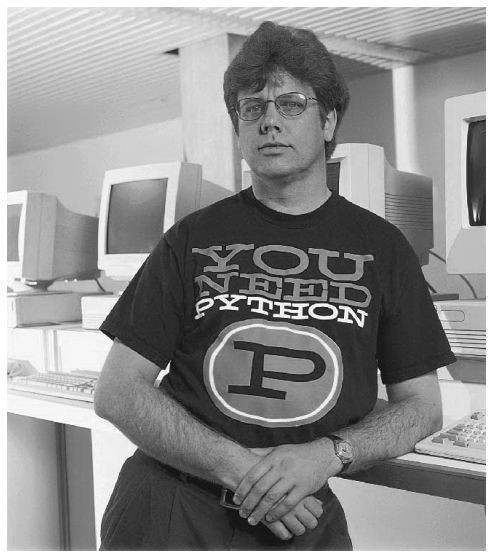

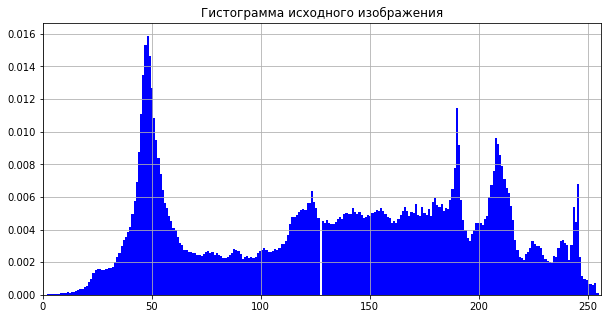

In [27]:
print('Исходное изображение:')
show_image(gray_img)
rendering(gray_img, plot_title='Гистограмма исходного изображения')

Препарированное изображение:


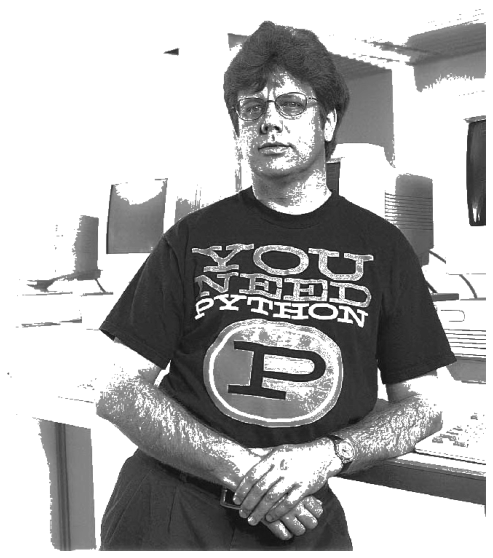

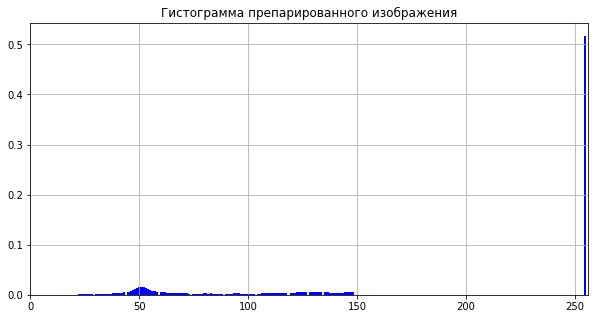

In [28]:
print('Препарированное изображение:')
prep_image = image_preparation(gray_img, dissection)
show_image(prep_image)
rendering(prep_image, plot_title='Гистограмма препарированного изображения')